# Fuel Economy Python Project
## by Robin Hollinger
### This project explores trends and various factors related to automobile fuel economy between 1970 and 1982.

## Part 1: Create a visual showing the relationship between horsepower and fuel economy. 


In [250]:
# Import Pandas, Seaborn and mpg dataset
import pandas as pd
import seaborn as sns
mpg = sns.load_dataset('mpg')

# Display first 5 rows of mpg dataset
mpg.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


<Axes: title={'center': 'Horsepower and Fuel Economy'}, xlabel='MPG', ylabel='Horsepower'>

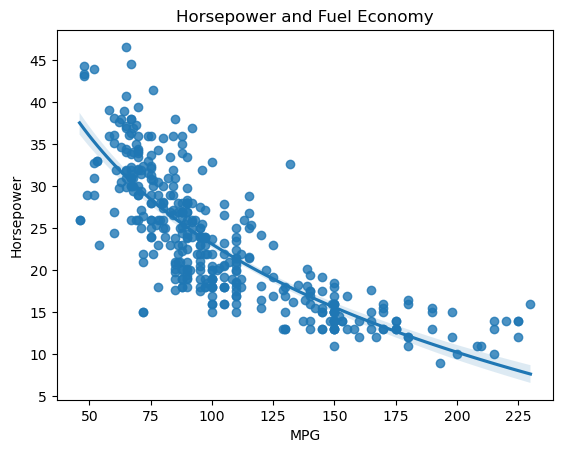

In [49]:
# Use Seaborn to create scatterplot with trendline
hp_mpg = sns.regplot(data=mpg, x='horsepower', y='mpg', logx=True)

# Set labels and display scatterplot
hp_mpg.set(xlabel='MPG', ylabel='Horsepower', title='Horsepower and Fuel Economy')
hp_mpg

#### Fuel economy varies inversely with horsepower. The trendline shows an estimated log-linear regression model

## Part 2: Create a table summarizing fuel economy by location of origin

In [52]:
# Group data by origin and sort by mean mpg
mpg.groupby('origin')['mpg'].mean().reset_index().sort_values(by='mpg', ascending=False)

,origin,mpg
1,japan,30.450633
0,europe,27.891429
2,usa,20.083534


#### For this dataset, Japan leads the way in average fuel economy, followed by Europe and then the United States.

## Part 3: Create a visual showing how fuel economy has changed over time

In [77]:
# Group data by model_year and calculate mean mpg
byyear = mpg.groupby('model_year')['mpg'].mean().reset_index()
byyear.head(5)

,model_year,mpg
0,70,17.689655
1,71,21.250000
2,72,18.714286
3,73,17.100000
4,74,22.703704


In [58]:
# Import Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
# Import NumPy to plot trendline
import numpy as np

Text(0.5, 1.0, 'Fuel Economy 1970-1982')

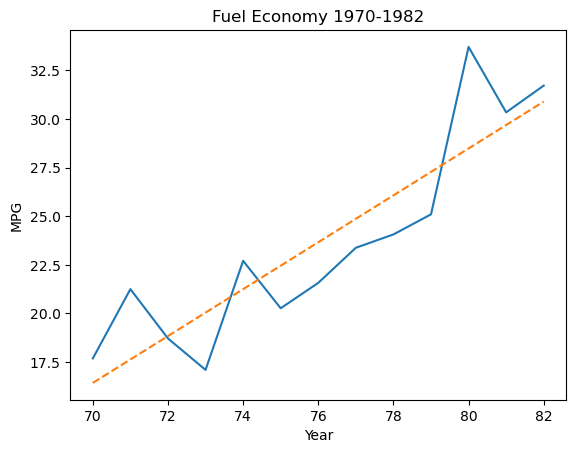

In [79]:
# Use Matplotlib to visualize fuel economy over time
plt.plot(byyear.model_year,byyear.mpg,'-')

# Calculate equation for trendline
z = np.polyfit(byyear.model_year, byyear.mpg, 1)
p = np.poly1d(z)

# Add trendline to plot
plt.plot(byyear.model_year, p(byyear.model_year), linestyle="--", label='Trendline')

# Add axis labels and title
plt.xlabel('Year')
plt.ylabel('MPG')
plt.title('Fuel Economy 1970-1982')

#### Overall, mean fuel economy increased steadily from 1970-1982, as indicated by the trendline.




## Part 4: How do fuel economy trends differ by location of origin?

In [153]:
# Create series by grouping data by model_year and origin
usa = mpg[mpg['origin'] == 'usa'].groupby('model_year')['mpg'].mean()
japan = mpg[mpg['origin'] == 'japan'].groupby('model_year')['mpg'].mean()
europe = mpg[mpg['origin'] == 'europe'].groupby('model_year')['mpg'].mean()

In [155]:
# Create dataframe to display mean mpg by origin
by_origin = pd.concat([usa,japan,europe], axis=1, keys=['USA','Japan','Europe']).reset_index()
by_origin.head(5)

,model_year,USA,Japan,Europe
0,70,15.272727,25.500000,25.20
1,71,18.100000,29.500000,28.75
2,72,16.277778,24.200000,22.00
3,73,15.034483,20.000000,24.00
4,74,18.333333,29.333333,27.00


<Axes: title={'center': 'Fuel Economy by Location of Origin'}, xlabel='Year', ylabel='MPG'>

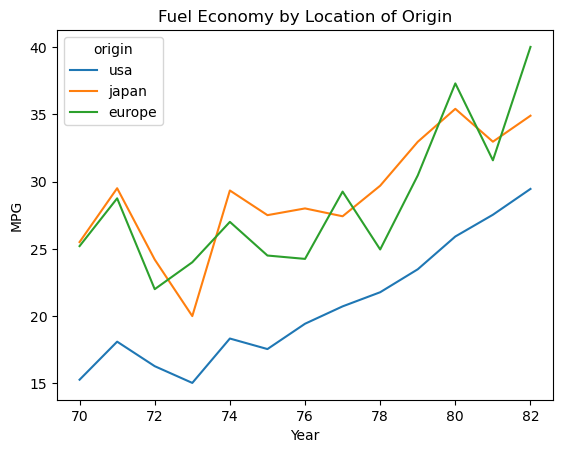

In [188]:
# Create line plot with Seaborn
by_year_origin = sns.lineplot(data=mpg, x='model_year', y='mpg', hue='origin', errorbar=None)
by_year_origin.set(xlabel='Year', ylabel='MPG', title='Fuel Economy by Location of Origin')
by_year_origin


#### Although fuel economy improved for all locations over the selected time period, cars from the USA were less economical on average than those in Japan and Europe.

## Part 5: Which automobile manufacturers had the highest fuel economy?

In [292]:
# Correct typos in the data
mpg['name'] = mpg['name'].str.replace('chevroelt','chevrolet')
mpg['name'] = mpg['name'].str.replace('toyouta','toyota')
mpg['name'] = mpg['name'].str.replace('vokswagen','volkswagen')

In [306]:
# Define a function to isolate manufacturer from automobile name
def mfg(x):
   return x.split(' ')[0]

# Run the function
mpg['manufacturer'] = mpg['name'].apply(mfg)

In [314]:
# Group data by manufacturer, sort by mean mpg, and display top 5
mfgs = mpg.groupby('manufacturer')['mpg'].mean().sort_values(ascending=False).reset_index()
mfgs.head(5)

,manufacturer,mpg
0,vw,39.016667
1,nissan,36.000000
2,triumph,35.000000
3,honda,33.761538
4,renault,32.880000


Text(0.5, 1.0, 'Fuel Economy by Manufacturer')

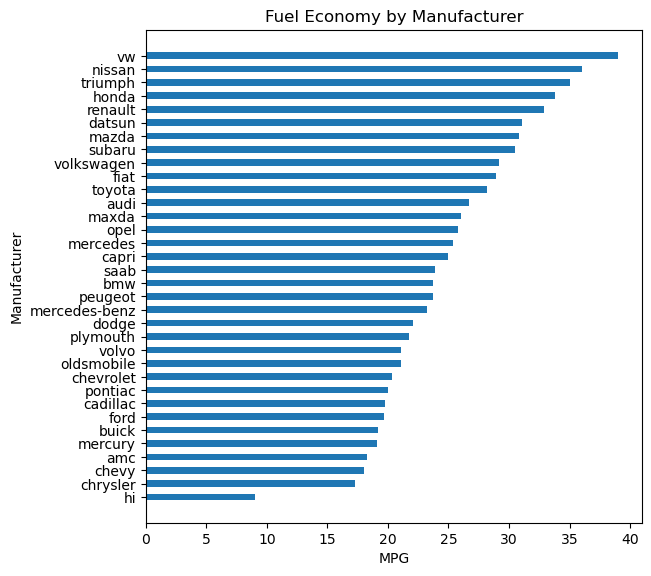

In [364]:
# Create bar plot with Matplotlib
plt.figure(figsize=(6.4, 6.4))
plt.barh(mfgs.manufacturer,mfgs.mpg,height=.5)
plt.gca().invert_yaxis()

# Add labels
plt.xlabel('MPG')
plt.ylabel('Manufacturer')
plt.title('Fuel Economy by Manufacturer')

#### The chart above shows all manufacturers from the dataset in order of highest to lowest mean mpg.